In [24]:
import ndlib
import networkx as nx
import ndlib.models.epidemics as ep
import json
import ndlib.models.ModelConfig as mc
import numpy as np
import math
import random
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.integrate import odeint



from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
from ndlib.viz.mpl.DiffusionPrevalence import DiffusionPrevalence

## Wikipedia code
Gillespie's Direct Method

In [25]:
# Input parameters ####################

# int; total population
N =300

# float; maximum elapsed time
T = 100.0

# float; start time
t = 0.0

# float; spatial parameter
V = N

# float; rate of infection after contact
beta = 15

# float; rate of cure
gamma = 5

# int; initial infected population
n_I = 5

#########################################

# Compute susceptible population, set recovered to zero
n_S = N - n_I
n_R = 0

# Initialize results list
SIR_data = []
SIR_data.append((t, n_S, n_I, n_R))

# Main loop
while t < T:
    if n_I == 0:
        break

    w1 = beta * n_S * n_I / V
    w2 = gamma * n_I
    w3 = 
    W = w1 + w2 + w3
    print(W)
    # generate exponentially distributed random variable dt
    # using inverse transform sampling
    dt = -math.log(1 - random.uniform(0.0, 1.0)) / W
    t = t + dt

    if random.uniform(0.0, 1.0) < w1 / W:
        n_S = n_S - 1
        n_I = n_I + 1
    else:
        n_I = n_I - 1
        n_R = n_R + 1

    SIR_data.append((t, n_S, n_I, n_R))

with open("SIR_data.txt", "w+") as fp:
    fp.write("\n".join("%f %i %i %i" % x for x in SIR_data))


from scipy.integrate import odeint
import numpy as np

# Numerical solution using an ordinary differential equation solver
ts = np.linspace(0, 2, num=200)
initial_S_I_R = (N - 5, 5, 0)


def differential_SIR(initial_S_I_R, t, beta, gamma, V):
    n_S, n_I, n_R = initial_S_I_R
    dS_dt = -beta * n_S / V * n_I
    dI_dt = (beta * n_S / V - gamma) * n_I
    dR_dt = gamma * n_I
    return dS_dt, dI_dt, dR_dt


solution = odeint(differential_SIR, initial_S_I_R, ts, args=(beta, gamma, V))
S1, I1, R1 = solution.T

n = 0
tg = [x[n] for x in SIR_data]
n = 1
Sg = [x[n] for x in SIR_data]
n = 2
Ig = [x[n] for x in SIR_data]
n = 3
Rg = [x[n] for x in SIR_data]

## from https://en.wikipedia.org/wiki/Gillespie_algorithm

SyntaxError: invalid syntax (<ipython-input-25-4683a30c9851>, line 41)

NameError: name 'ts' is not defined

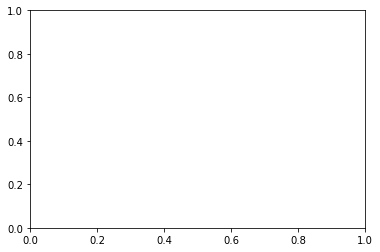

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(ts, S1, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(ts, I1, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(ts, R1, 'g', alpha=0.5, lw=2, label='Recovered')
ax.plot(tg, Sg, 'purple', alpha=0.5, lw=2, label='Susceptible Gil')
ax.plot(tg, Ig, 'brown', alpha=0.5, lw=2, label='Infected Gil')
ax.plot(tg, Rg, 'black', alpha=0.5, lw=2, label='Recovered Gil')
ax.set_xlabel('Time', size = 25)
ax.set_ylabel('Fraction', size = 25)
# ax.set_ylim(0,1.2)
# ax.set_xlim(0,2)
ax.grid(b=True, which='major', c='lightgray', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.legend(fontsize="large")

plt.show()

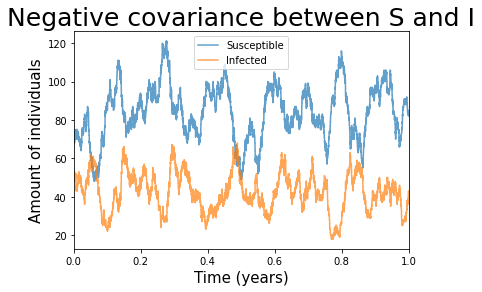

In [27]:
####################################################################
###    This is the PYTHON version of program 6.4 from page 203 of  #
### "Modeling Infectious Disease in humans and animals"            #
### by Keeling & Rohani.										   #
###																   #
### It is the SIR model (including births and deaths) with full    #
### (event-driven) demographic stochasticity.					   #
###																   #
### This is a more complex stochastic model as 6 events are		   #
### possible: infection, recovery, birth, death of susceptible,    #
### death of infected, death of recovered.					       #
### Note: by default we are using a very small population size 	   #
### to highlight the stochasticity.				   				   #
####################################################################

###################################
### Written by Ilias Soumpasis    #
### ilias.soumpasis@ucd.ie (work) #
### ilias.soumpasis@gmail.com	  #
###################################

import numpy as np
import pylab as pl

beta=1.0
gamma=1/7.0
mu=1/70
N0=500
# delta = math.sqrt(N0)*5.5e-03
delta = 0.0625*mu*(beta/gamma -1)*math.sqrt(N0)
### You may want to try with popylation size of 50 (small) to see the events
### In this case uncomment the next line
#N0=50.0
ND=MaxTime=2*365.0
Y0=pl.ceil(mu*N0/gamma)
X0=pl.floor(gamma*N0/beta)
# Y0=5
# X0=8000
Z0=N0-X0-Y0

INPUT = np.array((X0,Y0,Z0))

timestep=0.0

def stoc_eqs(INP,ts): 
	V = INP
	Rate=np.zeros((7))
	Change=np.zeros((7,3))
	N=np.sum(V[range(3)])
	Rate[0] = beta*V[0]*V[1]/N; Change[0,:]=([-1, +1, 0]);
	Rate[1] = gamma*V[1];  Change[1,:]=([0, -1, +1]);
	Rate[2] = mu*N;  Change[2,:]=([+1, 0, 0]);
	Rate[3] = mu*V[0];  Change[3,:]=([-1, 0, 0]);
	Rate[4] = mu*V[1];  Change[4,:]=([0, -1, 0]);
	Rate[5] = mu*V[2];  Change[5,:]=([0, 0, -1]);
	Rate[6] = delta;  Change[6,:]=([0, +1, 0]);
	R1=pl.rand();
	R2=pl.rand();
	ts = -np.log(R2)/(np.sum(Rate));
	list1 = np.cumsum(Rate)
	for i in range(len(list1)):
		if list1[i] >= R1*np.sum(Rate):
			V[range(3)] = V[range(3)]+Change[i,:]
			return [V,ts]
        
def Stoch_Iteration(INPUT):
    lop=0
    ts=0
    T=[0]
    S=[0]
    I=[0]
    R=[0]
    while T[lop] < ND:
        lop=lop+1
        T.append(T[lop-1]+ts)
        S.append(INPUT[0])
        I.append(INPUT[1])
        R.append(INPUT[2])
        [res,ts] = stoc_eqs(INPUT,ts)
        lop=lop+1
        T.append(T[lop-1])
        S.append(INPUT[0])
        I.append(INPUT[1])
        R.append(INPUT[2])
    return [T,S,I,R]


[T,S,I,R]=Stoch_Iteration(INPUT)

tT=np.array(T)[1:,]/365.
tS=np.array(S)[1:,]
tI=np.array(I)[1:,]
tR=np.array(R)[1:,]

plt.plot(tT, tS, alpha=0.7, label = 'Susceptible')
#pl.xlabel ('Time (years)')
plt.xlim(0,1)

plt.plot(tT, tI, alpha=0.7, label ='Infected')
plt.legend()
plt.title("Negative covariance between S and I", size = 25)
plt.xlabel ('Time (years)', size = 15)
plt.ylabel ('Amount of individuals', size = 15)
plt.show()

In [ ]:
####################################################################
###    This is the PYTHON version of program 6.4 from page 203 of  #
### "Modeling Infectious Disease in humans and animals"            #
### by Keeling & Rohani.										   #
###																   #
### It is the SIR model (including births and deaths) with full    #
### (event-driven) demographic stochasticity.					   #
###																   #
### This is a more complex stochastic model as 6 events are		   #
### possible: infection, recovery, birth, death of susceptible,    #
### death of infected, death of recovered.					       #
### Note: by default we are using a very small population size 	   #
### to highlight the stochasticity.				   				   #
####################################################################

###################################
### Written by Ilias Soumpasis    #
### ilias.soumpasis@ucd.ie (work) #
### ilias.soumpasis@gmail.com	  #
###################################

import numpy as np
import pylab as pl

beta=0.4
gamma=0.15
mu=0.0125
N0=500
# delta = math.sqrt(N0)*5.5e-03
delta = 0.0625*mu*(beta/gamma -1)*math.sqrt(N0)
### You may want to try with popylation size of 50 (small) to see the events
### In this case uncomment the next line
#N0=50.0
ND=MaxTime=2*365.0
Y0=50
X0=350
# Y0=5
# X0=8000
Z0=N0-X0-Y0

INPUT = np.array((X0,Y0,Z0))
y = INPUT/N0
timestep=0.0

def stoc_eqs(INP,ts): 
	V = INP
	Rate=np.zeros((7))
	Change=np.zeros((7,3))
	N=np.sum(V[range(3)])
	Rate[0] = beta*V[0]*V[1]/N; Change[0,:]=([-1, +1, 0]);
	Rate[1] = gamma*V[1];  Change[1,:]=([0, -1, +1]);
	Rate[2] = mu*N;  Change[2,:]=([+1, 0, 0]);
	Rate[3] = mu*V[0];  Change[3,:]=([-1, 0, 0]);
	Rate[4] = mu*V[1];  Change[4,:]=([0, -1, 0]);
	Rate[5] = mu*V[2];  Change[5,:]=([0, 0, -1]);
	Rate[6] = delta;  Change[6,:]=([0, +1, 0]);
	R1=pl.rand();
	R2=pl.rand();
	ts = -np.log(R2)/(np.sum(Rate));
	list1 = np.cumsum(Rate)
	for i in range(len(list1)):
		if list1[i] >= R1*np.sum(Rate):
			V[range(3)] = V[range(3)]+Change[i,:]
			return [V,ts]

def Stoch_Iteration(INPUT):
    lop=0
    ts=0
    T=[0]
    S=[0]
    I=[0]
    R=[0]
    while T[lop] < ND:
        lop=lop+1
        T.append(T[lop-1]+ts)
        S.append(INPUT[0])
        I.append(INPUT[1])
        R.append(INPUT[2])
        [INPUT,ts] = stoc_eqs(INPUT,ts)
        lop=lop+1
        T.append(T[lop-1])
        S.append(INPUT[0])
        I.append(INPUT[1])
        R.append(INPUT[2])
    return [T,S,I,R]
print(INPUT)
[T,S,I,R]=Stoch_Iteration(INPUT)
# print(S)
tT=np.array(T)[1:,]/365.
tS=np.array(S)[1:,]
tI=np.array(I)[1:,]
tR=np.array(R)[1:,]
def derivation3(y, t, beta, gamma, m, delta):
    S,I,R = y
    dSdt = m-beta * S * I  - m * S
    dIdt = beta * S * I  - gamma * I - m * I
    dRdt = gamma * I - m * R
    return dSdt, dIdt, dRdt
time = np.linspace(0,730,len(tT) + 1)
#y = INPUT/N
print(y, time, beta, gamma, mu, delta)
SIR = odeint(derivation3, y, time, args = (beta, gamma, mu, delta))
Sd,Id,Rd = SIR.T*N0
# print(Id)
# print(Sd)
# print(tS)
# print(tI)
plt.plot(time, Sd, 'b')
plt.plot(time, Id, 'r')


plt.plot(time[:-1], tS, alpha=0.7, label = 'Susceptible', color = 'b')
#pl.xlabel ('Time (years)')

plt.plot(time[:-1], tI, alpha=0.7, label ='Infected', color = 'r')
plt.legend()
plt.title('Increased transients in stochastic SIR', size = 15)
plt.xlabel ('Time', size = 13)
plt.ylabel ('Amount of individuals', size = 13)
plt.xlim(0,150)
plt.show()

In [ ]:
####################################################################
###    This is the PYTHON version of program 6.4 from page 203 of  #
### "Modeling Infectious Disease in humans and animals"            #
### by Keeling & Rohani.										   #
###																   #
### It is the SIR model (including births and deaths) with full    #
### (event-driven) demographic stochasticity.					   #
###																   #
### This is a more complex stochastic model as 6 events are		   #
### possible: infection, recovery, birth, death of susceptible,    #
### death of infected, death of recovered.					       #
### Note: by default we are using a very small population size 	   #
### to highlight the stochasticity.				   				   #
####################################################################

###################################
### Written by Ilias Soumpasis    #
### ilias.soumpasis@ucd.ie (work) #
### ilias.soumpasis@gmail.com	  #
###################################

import numpy as np
import pylab as pl

beta=1
gamma=0.7
mu=0.0125
N0=50000
# delta = math.sqrt(N0)*5.5e-03
delta = 0.0625*mu*(beta/gamma -1)*math.sqrt(N0)
### You may want to try with popylation size of 50 (small) to see the events
### In this case uncomment the next line
#N0=50.0
ND=MaxTime=2*365.0
Y0=200
X0=44000
# Y0=5
# X0=8000
Z0=N0-X0-Y0

INPUT = np.array((X0,Y0,Z0))
y = INPUT/N0
timestep = 0

def stoc_eqs(INP,ts):  
	V = INP
	Rate=np.zeros((7))
	Change=np.zeros((7,3))
	N=np.sum(V[range(3)])
	Rate[0] = beta*V[0]*V[1]/N; Change[0,:]=([-1, +1, 0]);
	Rate[1] = gamma*V[1];  Change[1,:]=([0, -1, +1]);
	Rate[2] = mu*N;  Change[2,:]=([+1, 0, 0]);
	Rate[3] = mu*V[0];  Change[3,:]=([-1, 0, 0]);
	Rate[4] = mu*V[1];  Change[4,:]=([0, -1, 0]);
	Rate[5] = mu*V[2];  Change[5,:]=([0, 0, -1]);
	Rate[6] = delta;  Change[6,:]=([0, +1, 0]);
	R1=pl.rand();
	R2=pl.rand();
	ts = -np.log(R2)/(np.sum(Rate));
	list1 = np.cumsum(Rate)
	for i in range(len(list1)):
		if list1[i] >= R1*np.sum(Rate):
			V[range(3)] = V[range(3)]+Change[i,:]
			return [V,ts]
    

def Stoch_Iteration(INPUT):
    lop=0
    ts=0
    T=[0]
    S=[0]
    I=[0]
    R=[0]
    while T[lop] < ND:
        lop=lop+1
        T.append(T[lop-1]+ts)
        S.append(INPUT[0])
        I.append(INPUT[1])
        R.append(INPUT[2])
        [res,ts] = stoc_eqs(INPUT,ts)
        lop=lop+1
        T.append(T[lop-1])
        S.append(INPUT[0])
        I.append(INPUT[1])
        R.append(INPUT[2])
    return [T,S,I,R]

# print(INPUT)
# [T,S,I,R]=Stoch_Iteration(INPUT)
# print(INPUT)
# tT=np.array(T)[0:,]/365.
# tS=np.array(S)[0:,]
# tI=np.array(I)[0:,]
# tR=np.array(R)[0:,]
def derivation3(y, t, beta, gamma, m, d):
    S,I,R = y
    dSdt = m-beta * S * I  - m * S
    dIdt = beta * S * I  - gamma * I - m * I
    dRdt = gamma * I - m * R
    return dSdt, dIdt, dRdt
time = np.linspace(0,730,1000)
d = delta / N0
print(y)
SIR = odeint(derivation3, y, time, args = (beta, gamma, mu, d))
Sd,Id,Rd = SIR.T*N0
#print(Id)
# print(Sd)
# print(tS)
# print(tI)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(time, Id)
for i in range(3):
    INPUT = np.array((X0,Y0,Z0))
    [T,S,I,R]=Stoch_Iteration(INPUT)
    tT=np.array(T)[1:,]
    tI=np.array(I)[1:,]
    print(tI)
    ax.plot(tT, tI, alpha=0.7)
    
ax.set_title('Stochastic resonance in stochastic SIR', size = 15)
ax.set_xlabel ('Time', size = 13)
ax.set_ylabel ('Amount of individuals', size = 13)
plt.show()

#plt.legend()



[0.88  0.004 0.116]
[200 200 200 ...  70  70  70]
